In [1]:
"""
DATA 144: Data Mining and Analytics - Fall 2019
Airbnb Project

Charis Chan. Joyce Ching. Chloe Lee. Brian Yang
"""

'\nDATA 144: Data Mining and Analytics - Fall 2019\nAirbnb Project\n\nCharis Chan. Joyce Ching. Chloe Lee. Brian Yang\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:

oct19_clean = pd.read_csv('airbnb_data_cleaned/oct19-cleaned.csv')
sept19_clean = pd.read_csv('airbnb_data_cleaned/sept19-cleaned.csv')

/Users/goomibear/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,15,18,27,33,40,43,60,69,70,71,72,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
sept19_clean.rename(columns= {'neighbourhood_cleansedy_trans' : 'neighbourhood_cleansed_trans'}, inplace= True)

In [5]:
sept19_clean.drop(index = 1272, inplace= True)
sept19_clean = sept19_clean.reset_index().drop(columns = ['index'])
oct19_clean.drop(index = 1263, inplace= True)
oct19_clean = oct19_clean.reset_index().drop(columns = ['index'])

In [6]:
# security_deposit as a float instead of string
oct19_clean['security_deposit'] = oct19_clean['security_deposit'].astype(float)
sept19_clean['security_deposit'] = sept19_clean['security_deposit'].astype(float)

In [7]:
# security_deposit fill na with 0
oct19_clean['security_deposit'] = oct19_clean['security_deposit'].fillna(0)
sept19_clean['security_deposit'] = sept19_clean['security_deposit'].fillna(0)

In [8]:
# guests_included as float
oct19_clean['guests_included'] = oct19_clean['guests_included'].astype(float)
sept19_clean['guests_included'] = sept19_clean['guests_included'].astype(float)

In [9]:
# price as float
sept19_clean['price'] = sept19_clean['price'].astype(float)
oct19_clean['price'] = oct19_clean['price'].astype(float)

In [10]:
#subset of quantitative columns
columns_to_keep = ['id', 'price', 'security_deposit', 'guests_included', 
                   'extra_people', 'minimum_nights', 'maximum_nights', 
                   'availability_30', 'number_of_reviews', 
                   'review_scores_rating', 'bed_type_trans', 'cancellation_policy_trans',
                   'bedrooms', 'beds', 'bathrooms', 'neighbourhood_cleansed_trans', 
                   'room_type_trans', 'len_amenities', 'tv_trans', 'internet_trans', 
                   'wifi_trans', 'kitchen_trans','heating_trans', 'air_conditioning_trans', 
                   'dryer_trans','24hr_checkin_trans', 'self_checkin_trans', 'breakfast_trans',
                   'washer_trans', 'smoke_detector_trans', 'host_greets_trans',
                   'hot_water_trans', 'parking_trans', 'balcony_trans',
                   'garden_trans', 'cooking_trans', 'BBQ_trans', 'oven_trans',
                   'stove_trans', 'hairdryer_trans', 'dishwasher_trans',
                   'fridge_trans', 'coffeemaker_trans', 'microwave_trans',
                   'private_bath_trans', 'laptop_friendly_trans', 'essentials_trans',
                   'lock_trans', 'dishes_trans', 'host_score', 'summary_polarity',
                   'space_polarity', 'description_polarity','neighborhood_overview_polarity', 
                   'house_rules_polarity','review_polarity_avg', 'review_polarity_stdv']


In [11]:
oct19_filtered = oct19_clean[columns_to_keep]
sept19_filtered = sept19_clean[columns_to_keep]

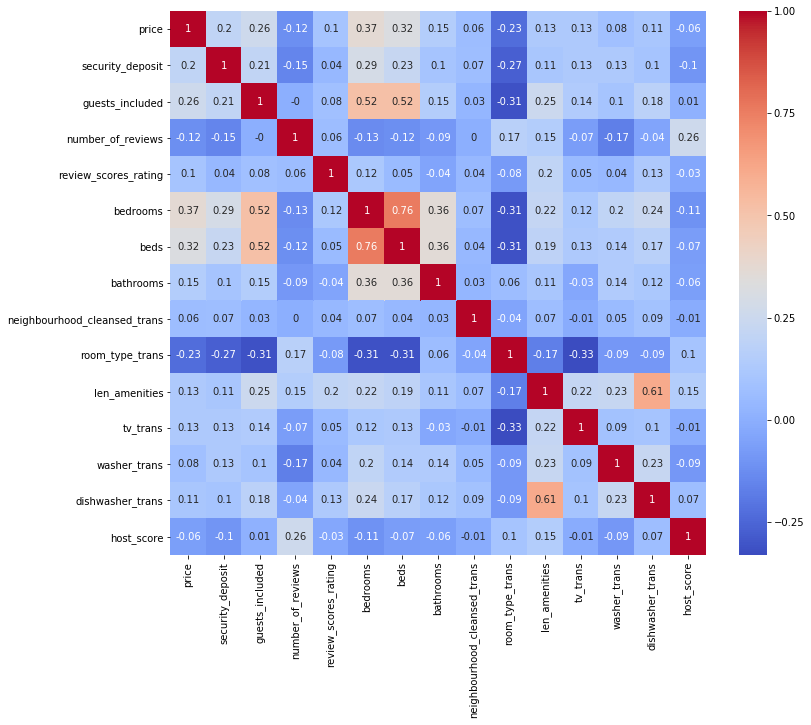

In [12]:
plt.figure(figsize=(12,10))
cor = sept19_filtered.iloc[:, [1,2,3,8,9,12,13,14,15,16,17,18,28,40,49]].corr()
sns.heatmap(round(cor,2), annot=True, cmap="coolwarm")
plt.show()

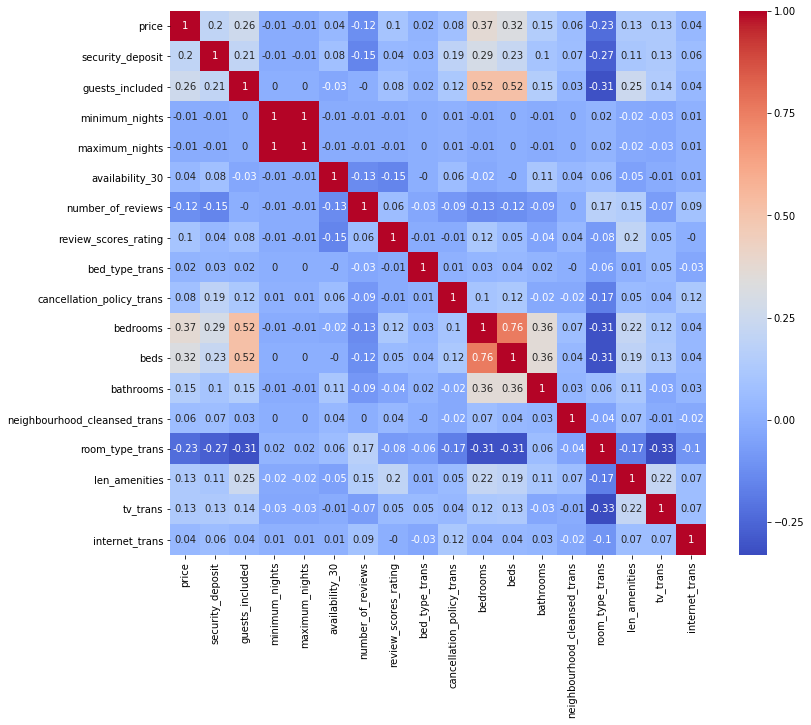

In [13]:
plt.figure(figsize=(12,10))
cor = sept19_filtered.iloc[:, 1:20].corr()
sns.heatmap(round(cor,2), annot=True, cmap="coolwarm")
plt.show()

In [14]:
other_index = [1]
other_index.extend(range(20,40))

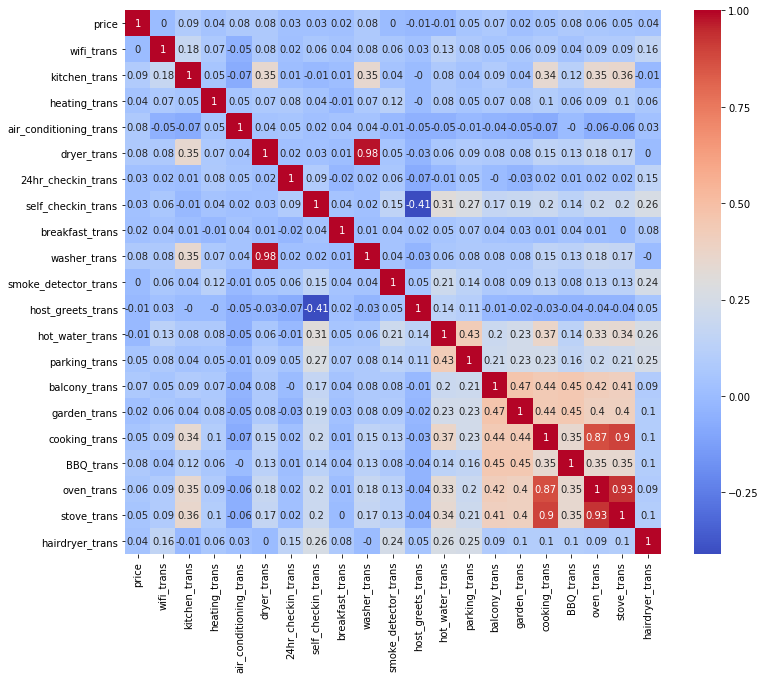

In [15]:
plt.figure(figsize=(12,10))
cor = sept19_filtered.iloc[:, other_index].corr()
sns.heatmap(round(cor,2), annot=True, cmap="coolwarm")
plt.show()

In [16]:
last_index = [1]
last_index.extend(range(40,57))

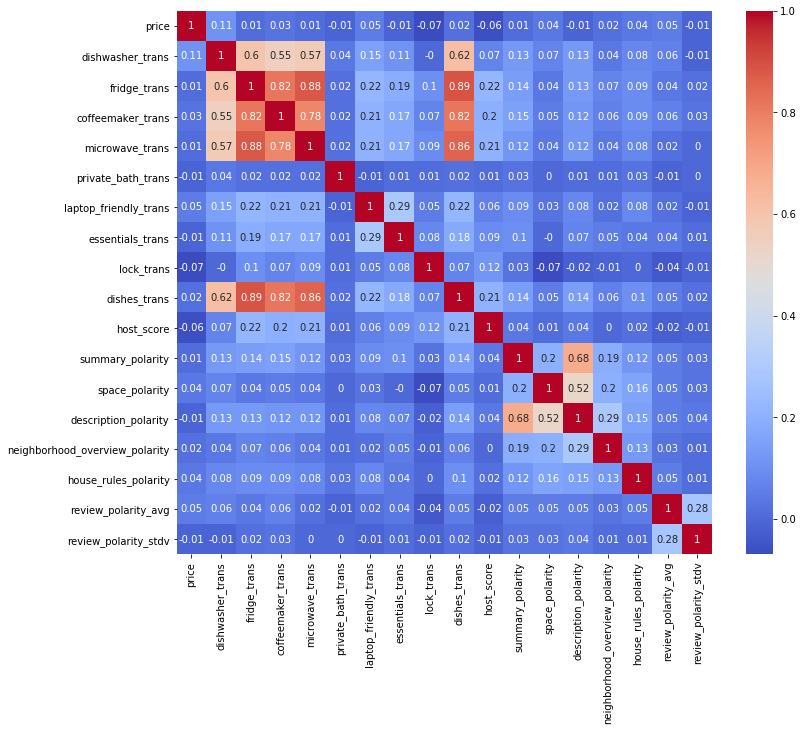

In [17]:
plt.figure(figsize=(12,10))
cor = sept19_filtered.iloc[:, last_index].corr()
sns.heatmap(round(cor,2), annot=True, cmap="coolwarm")
plt.show()

In [18]:
cor = sept19_filtered.corr()
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.10]
relevant_features

price                   1.000000
security_deposit        0.201205
guests_included         0.260116
number_of_reviews       0.120108
review_scores_rating    0.102124
bedrooms                0.370385
beds                    0.324817
bathrooms               0.146387
room_type_trans         0.227307
len_amenities           0.125007
tv_trans                0.129591
dishwasher_trans        0.113876
Name: price, dtype: float64

In [19]:
sept19_filtered.iloc[:, [1,2,3,8,9,12,13,14,15,16,17,18,28,40,49]].columns

Index(['price', 'security_deposit', 'guests_included', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds', 'bathrooms',
       'neighbourhood_cleansed_trans', 'room_type_trans', 'len_amenities',
       'tv_trans', 'washer_trans', 'dishwasher_trans', 'host_score'],
      dtype='object')

In [20]:
XY= list(relevant_features.index)
XY.extend(['host_score'])
XY

['price',
 'security_deposit',
 'guests_included',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds',
 'bathrooms',
 'room_type_trans',
 'len_amenities',
 'tv_trans',
 'dishwasher_trans',
 'host_score']

In [21]:
data_XY = sept19_filtered[XY].copy().dropna()
data_X = data_XY.drop(columns=['price'])

In [22]:
len(data_XY)

5020

In [23]:
# scores = []
# for i in range(2,9):
#   kmeans = KMeans(n_clusters=i, random_state=42)
#   kmeans.fit(data_X)
#   scores.append(silhouette_score(data_X, kmeans.labels_))
# best_n = np.argmax(scores) + 2
# best_n

<Figure size 1440x720 with 0 Axes>

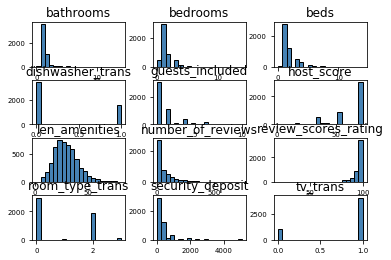

In [24]:
plt.figure(figsize=(20, 10))
data_X.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=7, ylabelsize=7, grid=False) 
#plt.tight_layout(rect=(1, 1, 1.2, 1.2)) 
plt.show()

In [25]:
# kmeans = KMeans(n_clusters=2, random_state=42)
# kmeans.fit(data_X)

In [26]:
# data_wlabels = data_XY.copy()
# data_wlabels['labels'] = kmeans.labels_ 

In [27]:
# for column in data_wlabels.columns:
#   sns.catplot(x = column, y = 'price', hue= 'labels', data = data_wlabels, kind="bar",height=6)
  

In [28]:
sept19_ids = sept19_filtered['id'].unique()
oct19_ids = oct19_filtered['id'].unique()

In [29]:
sept19_filtered[pd.Series(sept19_ids).isin(oct19_ids)].loc[:,XY].isnull().sum()

price                     1
security_deposit          0
guests_included           1
number_of_reviews         1
review_scores_rating    343
bedrooms                  2
beds                      6
bathrooms                13
room_type_trans           1
len_amenities             1
tv_trans                  1
dishwasher_trans          1
host_score                1
dtype: int64

In [30]:
# finding the data we are testing the model with
test_oct_data = oct19_filtered.loc[:,XY].dropna()

# finding bounds for outliers for oct data
q1_o, q3_o = np.percentile(test_oct_data['price'],[25,75])

iqr_o = q3_o - q1_o

lower_bound_o = q1_o -(1.5 * iqr_o) 
upper_bound_o = q3_o +(1.5 * iqr_o) 

#taking out outliers of the price
test_oct_data = test_oct_data[~(test_oct_data['price'] >= upper_bound_o)]

#retaining only new listings
test_oct_data = test_oct_data[~(pd.Series(oct19_ids).isin(sept19_ids))]

# there ares 108 rows

/Users/goomibear/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [31]:
#finding the data we are training the model with
data_sept = sept19_filtered[pd.Series(sept19_ids).isin(oct19_ids)].loc[:,XY].dropna()
data_sept = data_sept[data_sept['price'] != 0]

# finding bounds for outliers
q1, q3 = np.percentile(data_sept['price'],[25,75])

iqr = q3 - q1

lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

# taking out outliers of the price
data_sept = data_sept[~(data_sept['price'] >= upper_bound)]

# taking out outlier of bedrooms, price is $69 per night with 14 bedrooms and 14 beds and 14 bathrooms
data_sept = data_sept[~(data_sept['bedrooms'] == 14)]

#there are 4619 rows

In [32]:
len(data_sept)

4289

In [33]:
 s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(data_sept.drop(columns= ['price']), data_sept['price'], test_size=0.30, random_state=42)

In [34]:
# scores = []
# for i in range(2,9):
#   kmeans = KMeans(n_clusters=i, random_state=42)
#   kmeans.fit(s_X_train)
#   scores.append(silhouette_score(s_X_train, kmeans.labels_))
# best_n = np.argmax(scores) + 2
# best_n

In [35]:
# sept_kmeans = KMeans(n_clusters=2, random_state=42)
# sept_kmeans.fit(s_X_train)
# sept_wlabels = s_X_train.copy()
# sept_wlabels['labels'] = sept_kmeans.labels_ 

In [36]:
# sept_kmeans.fit(s_X_test)
# sept_wlabels_test = s_X_test.copy()
# sept_wlabels_test['labels'] = sept_kmeans.labels_ 

In [37]:
# group0_sept = sept_wlabels[sept_wlabels['labels'] == 0].drop(columns = ['labels'])
# group0_sept_y = s_y_train[sept_wlabels['labels'] == 0]
# group1_sept = sept_wlabels[sept_wlabels['labels'] == 1].drop(columns = ['labels'])
# group1_sept_y = s_y_train[sept_wlabels['labels'] == 1]

In [38]:
# group0_sept_test = sept_wlabels_test[sept_wlabels_test['labels'] == 0].drop(columns = ['labels'])
# group0_sept_y_test = s_y_test[sept_wlabels_test['labels'] == 0]
# group1_sept_test = sept_wlabels_test[sept_wlabels_test['labels'] == 1].drop(columns = ['labels'])
# group1_sept_y_test = s_y_test[sept_wlabels_test['labels'] == 1]

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
# poly = PolynomialFeatures(2)

# X0_sept_poly = poly.fit_transform(group0_sept.as_matrix())

# poly1 = PolynomialFeatures(2)
# X1_sept_poly = poly1.fit_transform(group1_sept.as_matrix())

In [41]:
 # no cluster polynomial 2
 poly_no_clust = PolynomialFeatures(2)
 X_sept_poly = poly_no_clust.fit_transform(s_X_train.as_matrix())

/Users/goomibear/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
# no clusters polynomial 2
clf_sept = LinearRegression().fit(X_sept_poly, s_y_train)

In [43]:
# no clusters polynomial 2
# rmse on train sept
mean_squared_error(np.array(s_y_train), clf_sept.predict(X_sept_poly))**(1/2)

62.15850242487734

In [44]:
 # no clusters polynomial 2
 X_sept_poly_test = poly_no_clust.fit_transform(s_X_test.as_matrix())

/Users/goomibear/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [45]:
# no clusters polynomial 2
# rmse on test sept
mean_squared_error(np.array(s_y_test), clf_sept.predict(X_sept_poly_test))**(1/2)

63.46012618710301

In [46]:
X_oct_poly = poly_no_clust.fit_transform(test_oct_data.drop(columns= ['price']).as_matrix())

/Users/goomibear/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [47]:
# no clusters polynomial 2
# rmse on test oct
mean_squared_error(np.array(test_oct_data['price']), clf_sept.predict(X_oct_poly))**(1/2)

81.58254056069049

In [48]:
# Linear Regression
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(s_X_train, s_y_train)

In [49]:
# rmse on train sept
mean_squared_error(np.array(s_y_train), clf.predict(s_X_train))**(1/2)

66.02134887432229

In [50]:
# rmse on test sept
mean_squared_error(np.array(s_y_test), clf.predict(s_X_test))**(1/2)

65.08855678183136

In [51]:
# rmse on test oct
mean_squared_error(np.array(test_oct_data['price']), clf.predict(test_oct_data.drop(columns = ['price'])))**(1/2)

65.29526131903434

In [52]:
r2_score(np.array(test_oct_data['price']), clf.predict(test_oct_data.drop(columns = ['price'])))

0.4124825684901685

In [53]:
# clf_sept0 = LinearRegression().fit(X0_sept_poly, group0_sept_y)
# clf_sept1 = LinearRegression().fit(X1_sept_poly, group1_sept_y)

In [54]:
# mean_squared_error(np.array(group0_sept_y), clf_sept0.predict(X0_sept_poly))**(1/2)

In [55]:
# X0_sept_poly_test = poly.fit_transform(group0_sept_test.as_matrix())

# X1_sept_poly_test = poly1.fit_transform(group1_sept_test.as_matrix())

In [56]:
# mean_squared_error(np.array(group1_sept_y_test), clf_sept1.predict(X1_sept_poly_test))**(1/2)

In [57]:
# mean_squared_error(np.array(group1_sept_y), clf_sept1.predict(X1_sept_poly))**(1/2)

In [58]:
# reg_sept0 = LinearRegression().fit(group0_sept, group0_sept_y)
# reg_sept1 = LinearRegression().fit(group1_sept, group1_sept_y)

In [59]:
# reg_sept0.score(group0_sept, group0_sept_y)
# reg_sept1.score(group1_sept, group1_sept_y)

In [60]:
# reg_oct1.score(group1_oct, np.log(group1_oct_y))
# reg_oct2.score(group2_oct, np.log(group2_oct_y))
# reg_oct3.score(group3_oct, np.log(group3_oct_y))
# reg_oct4.score(group4_oct, np.log(group4_oct_y))

In [61]:
# pred = reg_sept1.predict(group1_sept)

In [62]:
# mean_squared_error(np.array(group1_sept_y), pred)**(1/2)

In [63]:
# try knn 

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(s_X_train, s_y_train)
model.best_params_

{'n_neighbors': 9}

In [65]:
# from sklearn.svm import SVR

In [66]:
# svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
#                coef0=1)

In [67]:
# svr_poly.fit(group0_sept, group0_sept_y)

In [68]:
# mean_squared_error(np.array(group0_sept_y), svr_poly.predict(group0_sept))**(1/2)

In [69]:
# svr_poly.score(group0_sept, group0_sept_y)

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 120, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf_gb = GradientBoostingRegressor(**params).fit(s_X_train, s_y_train)

In [72]:
#rmse on train sept
mean_squared_error(s_y_train, clf_gb.predict(s_X_train))**(1/2)

62.18481561197545

In [73]:
#rmse on test sept
mean_squared_error(s_y_test, clf_gb.predict(s_X_test))**(1/2)

66.26399997307438

In [74]:
#rmse on test oct
mean_squared_error(test_oct_data['price'], clf_gb.predict(test_oct_data.drop(columns = ['price'])))**(1/2)

65.50629141839048

In [75]:
r2_score(test_oct_data['price'], clf_gb.predict(test_oct_data.drop(columns = ['price'])))

0.40867879426877074

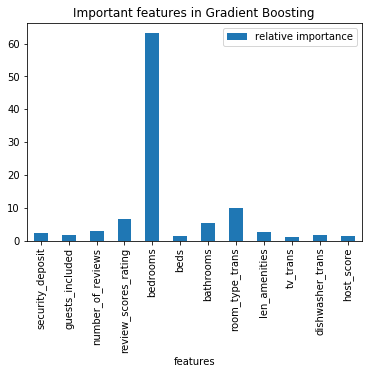

In [76]:
# Relative importance of features for Gradient Boosting
rel_imp_gb = pd.DataFrame({'features': np.array(s_X_train.columns), 'relative importance': clf_gb.feature_importances_*100})
rel_imp_gb.plot.bar(x='features', y='relative importance', rot=90)
plt.title('Important features in Gradient Boosting')
plt.show()

In [77]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf_gb.staged_predict(s_X_test)):
    test_score[i] = clf_gb.loss_(s_y_test, y_pred)

Text(0, 0.5, 'Deviation')

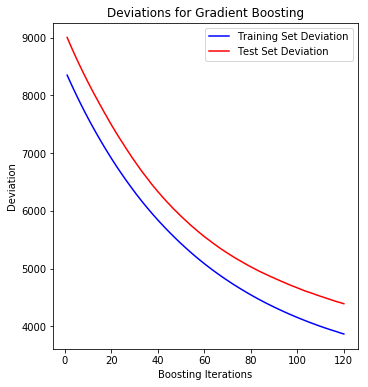

In [78]:
# Deviations for Gradient Boosting
# Loss is Least squares
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviations for Gradient Boosting')
plt.plot(np.arange(params['n_estimators']) + 1, clf_gb.train_score_, 'b-',
         label='Training Set Deviation')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviation')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviation')

In [79]:
#RandomForest Regression prediction
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(bootstrap = True, n_estimators = 1000, max_depth = 5).fit(s_X_train,s_y_train)

In [80]:
#rmse on train sept
mean_squared_error(s_y_train, forest.predict(s_X_train))**(1/2)

59.29433578888903

In [81]:
#rmse on test sept
mean_squared_error(s_y_test, forest.predict(s_X_test))**(1/2)

61.952773156556795

In [82]:
#rmse on test oct
mean_squared_error(test_oct_data['price'], forest.predict(test_oct_data.drop(columns = ['price'])))

3980.779912311279

In [83]:
r2_score(test_oct_data['price'], forest.predict(test_oct_data.drop(columns = ['price'])))

0.45143815759336103

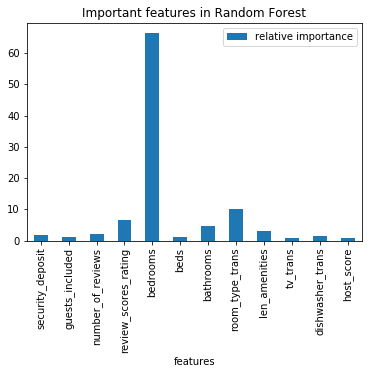

In [84]:
# relative importance of features in Random Forest
rel_imp_rf = pd.DataFrame({'features': np.array(s_X_train.columns), 'relative importance': forest.feature_importances_*100})
rel_imp_rf.plot.bar(x='features', y='relative importance', rot=90)
plt.title('Important features in Random Forest')
plt.show()

In [85]:
from sklearn.neighbors import KNeighborsRegressor

In [86]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='brute').fit(s_X_train, s_y_train)

In [87]:
#rmse on train sept
mean_squared_error(s_y_train, knn.predict(s_X_train))**(1/2)

68.52720414692648

In [88]:
#rmse on test sept
mean_squared_error(s_y_test, knn.predict(s_X_test))**(1/2)

86.77681112771401

In [89]:
#rmse on test oct
mean_squared_error(test_oct_data['price'], knn.predict(test_oct_data.drop(columns = ['price'])))

7542.648148148148

In [90]:
r2_score(test_oct_data['price'], knn.predict(test_oct_data.drop(columns = ['price'])))

-0.039396564471416706

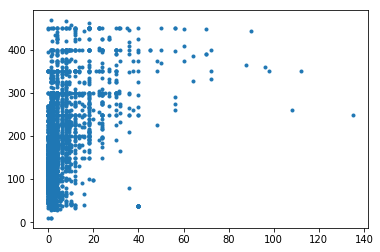

In [91]:
plt.plot(data_sept['bathrooms']*data_sept['beds']*data_sept['bedrooms'], data_sept['price'], '.')

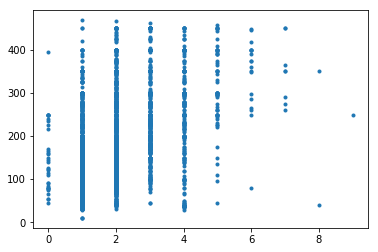

In [92]:
plt.plot(data_sept['beds'], data_sept['price'], '.')
plt.show()

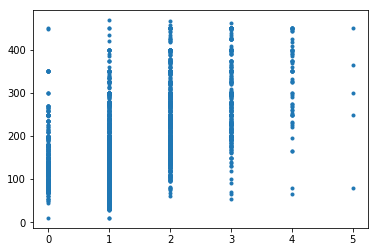

In [93]:
plt.plot(data_sept['bedrooms'], data_sept['price'], '.')
plt.show()

In [94]:
data_sept[~(data_sept['price'] >= upper_bound)]


,price,security_deposit,guests_included,number_of_reviews,review_scores_rating,bedrooms,beds,bathrooms,room_type_trans,len_amenities,tv_trans,dishwasher_trans,host_score
0,170.0,100.0,2.0,210.0,97.0,1.0,2.0,1.0,0.0,30.0,1.0,0.0,70.00
1,99.0,0.0,2.0,149.0,94.0,1.0,1.0,1.0,2.0,30.0,0.0,0.0,70.00
2,235.0,0.0,2.0,111.0,98.0,2.0,3.0,1.0,0.0,17.0,0.0,0.0,35.00
3,65.0,200.0,1.0,17.0,85.0,1.0,1.0,4.0,2.0,18.0,1.0,0.0,70.00
4,65.0,200.0,1.0,8.0,93.0,1.0,1.0,4.0,2.0,16.0,1.0,0.0,70.00
6,139.0,0.0,2.0,696.0,98.0,1.0,2.0,1.0,2.0,33.0,1.0,1.0,70.00
7,135.0,0.0,1.0,502.0,94.0,1.0,1.0,1.0,2.0,33.0,1.0,0.0,70.00
8,225.0,500.0,1.0,337.0,96.0,2.0,3.0,1.0,0.0,30.0,1.0,0.0,35.00
9,120.0,500.0,2.0,18.0,99.0,0.0,1.0,1.0,0.0,17.0,1.0,0.0,52.50
10,177.0,2500.0,6.0,37.0,89.0,3.0,3.0,1.0,0.0,12.0,1.0,0.0,52.50


In [95]:
data_sept[data_sept['bedrooms'] == 14]

,price,security_deposit,guests_included,number_of_reviews,review_scores_rating,bedrooms,beds,bathrooms,room_type_trans,len_amenities,tv_trans,dishwasher_trans,host_score


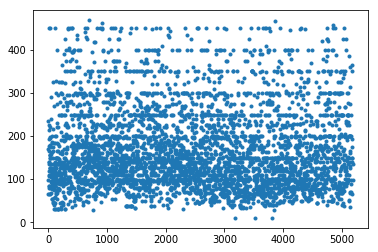

In [96]:
plt.plot(data_sept['price'], '.')

In [97]:
q1, q3 = np.percentile(data_sept['price'],[25,75])

In [98]:
# finding bounds for outliers
q1, q3 = np.percentile(data_sept['price'],[25,75])

iqr = q3 - q1

lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [99]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [100]:
lower_bound

-81.0

In [101]:
upper_bound

399.0

In [102]:
test_oct_data

,price,security_deposit,guests_included,number_of_reviews,review_scores_rating,bedrooms,beds,bathrooms,room_type_trans,len_amenities,tv_trans,dishwasher_trans,host_score
82,90.0,500.0,2.0,44.0,79.0,1.0,0.0,1.0,0.0,11.0,1.0,0.0,52.500000
124,150.0,550.0,5.0,82.0,97.0,3.0,3.0,1.0,0.0,18.0,1.0,0.0,17.500000
218,225.0,1000.0,1.0,5.0,100.0,1.0,1.0,1.0,0.0,40.0,1.0,0.0,52.500000
228,189.0,750.0,3.0,111.0,94.0,3.0,3.0,1.0,0.0,19.0,1.0,0.0,17.500000
235,119.0,0.0,1.0,11.0,95.0,1.0,2.0,1.0,2.0,44.0,1.0,1.0,70.000000
257,355.0,800.0,4.0,27.0,100.0,2.0,2.0,2.0,0.0,16.0,1.0,0.0,52.500000
357,100.0,300.0,2.0,19.0,93.0,2.0,2.0,1.0,0.0,34.0,0.0,0.0,52.500000
448,289.0,4000.0,3.0,2.0,100.0,2.0,2.0,2.0,0.0,34.0,1.0,0.0,70.000000
451,135.0,200.0,3.0,83.0,93.0,1.0,2.0,1.0,0.0,20.0,1.0,0.0,35.000000
456,300.0,500.0,1.0,9.0,95.0,2.0,1.0,1.0,2.0,27.0,1.0,0.0,35.000000


In [103]:
dict = {'security_deposit': [0, 1000.0], 'guests_included': [3, 1], 'number_of_reviews': [100, 1], 'review_scores_rating': [100, 10], 'bedrooms': [3, 1], 'beds': [3, 1], 'bathrooms': [3, 1], 'room_type_trans': [1, 3], 'len_amenitites': [40, 5], 'tv_trans': [1, 0], 'dishwasher_trans': [1, 0], 'host_score': [100, 10]}
df = pd.DataFrame.from_dict(dict)
df

,security_deposit,guests_included,number_of_reviews,review_scores_rating,bedrooms,beds,bathrooms,room_type_trans,len_amenitites,tv_trans,dishwasher_trans,host_score
0,0.0,3,100,100,3,3,3,1,40,1,1,100
1,1000.0,1,1,10,1,1,1,3,5,0,0,10


In [104]:
#for linear regression
print(clf.predict(df.iloc[[0]]))
print(clf.predict(df.iloc[[1]]))

[261.98755582]
[-91.50812201]


In [105]:
#for random forest
print(forest.predict(df.iloc[[0]]))
print(forest.predict(df.iloc[[1]]))

[362.09071641]
[100.16963874]


In [106]:
#for gradient boosting
print(clf_gb.predict(df.iloc[[0]]))
print(clf_gb.predict(df.iloc[[1]]))

[298.09388633]
[119.71275158]


In [107]:
#for k-nearest neighbores
print(knn.predict(df.iloc[[0]]))
print(knn.predict(df.iloc[[1]]))

[105.4]
[167.8]
